<a href="https://colab.research.google.com/github/Francisss3/AAI614_Francis-/blob/main/Income_Analysis_Project_Census_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [3]:
# Data Exploration

import pandas as pd
import numpy as np

# Combine features and target into one dataframe
data = pd.concat([X, y], axis=1)

# Step 1: Validate data types
print("Data Types:")
print(data.dtypes)

# Step 2: Handle missing values
# Convert missing values ('?' in the dataset description) to np.nan
data.replace('?', np.nan, inplace=True)

# Count missing values per column
missing_values_count = data.isnull().sum()
print("\nMissing Values Count:")
print(missing_values_count)



Data Types:
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

Missing Values Count:
age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64


In [5]:
# Impute missing values for categorical features with "Unknown"
data = data.copy()
data['workclass'] = data['workclass'].fillna('Unknown')
data['occupation'] = data['occupation'].fillna('Unknown')
data['native-country'] = data['native-country'].fillna('Unknown')

# Verify that there are no more missing values
missing_values_count = data.isnull().sum()
print("\nMissing Values Count After Imputation (Revised):")
print(missing_values_count)



Missing Values Count After Imputation (Revised):
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


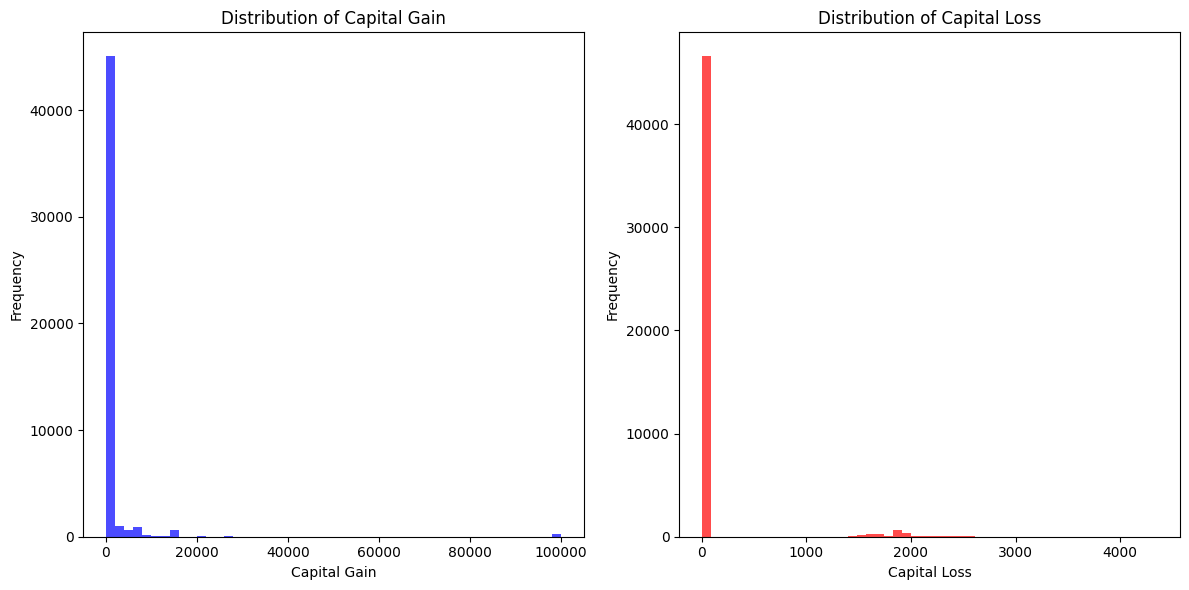

In [6]:
import matplotlib.pyplot as plt

# Plot distributions for capital-gain and capital-loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(data['capital-gain'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Capital Gain')
plt.xlabel('Capital Gain')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(data['capital-loss'], bins=50, color='red', alpha=0.7)
plt.title('Distribution of Capital Loss')
plt.xlabel('Capital Loss')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [7]:
# Create binary variables for capital-gain and capital-loss
data['capital_gain_binary'] = data['capital-gain'].apply(lambda x: 1 if x > 0 else 0)
data['capital_loss_binary'] = data['capital-loss'].apply(lambda x: 1 if x > 0 else 0)

# Check the distribution of the new variables
print("Capital Gain Binary Distribution:")
print(data['capital_gain_binary'].value_counts())

print("\nCapital Loss Binary Distribution:")
print(data['capital_loss_binary'].value_counts())


Capital Gain Binary Distribution:
capital_gain_binary
0    44807
1     4035
Name: count, dtype: int64

Capital Loss Binary Distribution:
capital_loss_binary
0    46560
1     2282
Name: count, dtype: int64


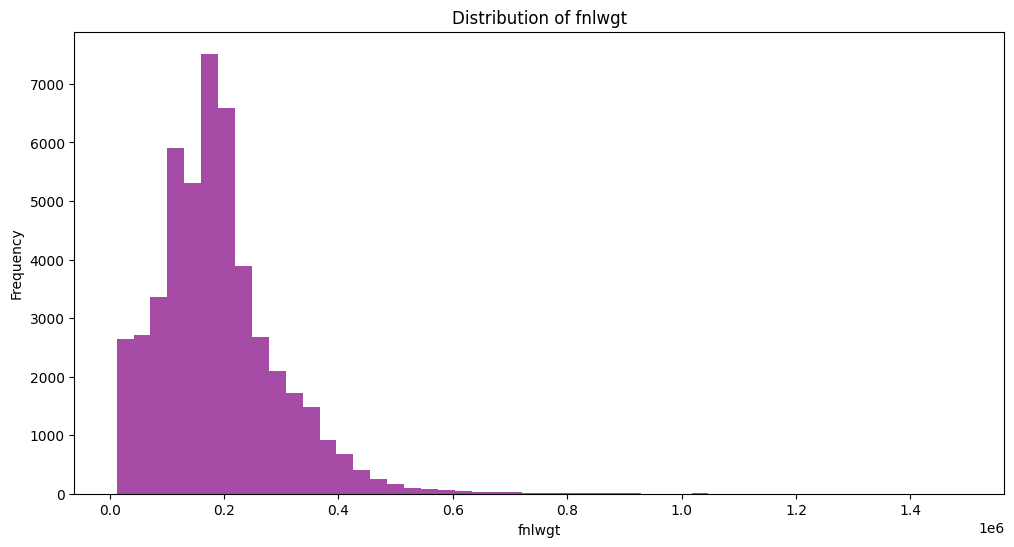

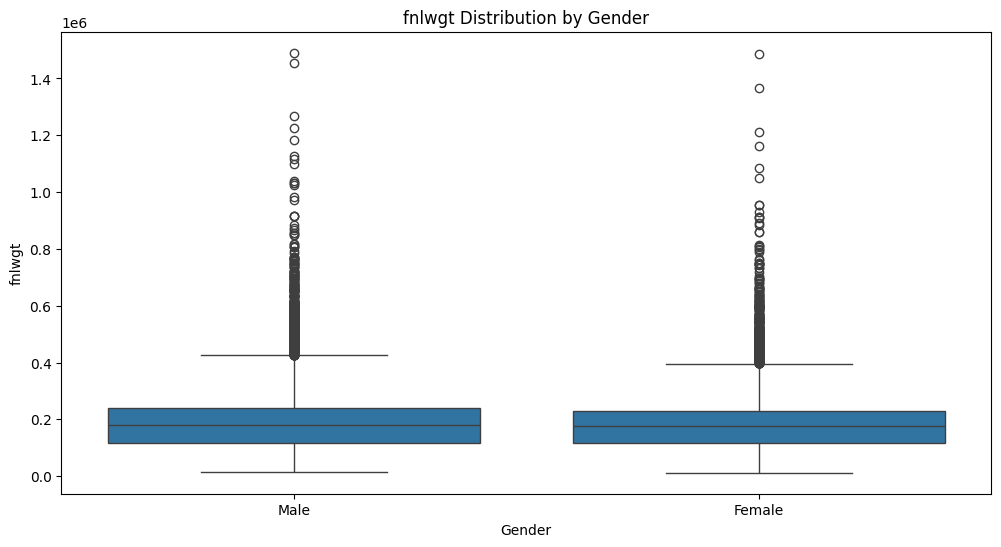

          count           mean            std      min       25%       50%  \
sex                                                                          
Female  16192.0  185504.471714  103217.151490  12285.0  116560.0  175572.0   
Male    32650.0  191727.021623  106709.380155  13492.0  117963.0  180138.0   

              75%        max  
sex                           
Female  228609.25  1484705.0  
Male    241722.50  1490400.0  


In [8]:
# Plot the distribution of fnlwgt
plt.figure(figsize=(12, 6))
plt.hist(data['fnlwgt'], bins=50, color='purple', alpha=0.7)
plt.title('Distribution of fnlwgt')
plt.xlabel('fnlwgt')
plt.ylabel('Frequency')
plt.show()

# Compare fnlwgt distribution by gender
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='sex', y='fnlwgt', data=data)
plt.title('fnlwgt Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('fnlwgt')
plt.show()

# Describe fnlwgt statistics by gender
print(data.groupby('sex')['fnlwgt'].describe())


Correlation Matrix:
                     age  education-num  hours-per-week
age             1.000000       0.030940        0.071558
education-num   0.030940       1.000000        0.143689
hours-per-week  0.071558       0.143689        1.000000


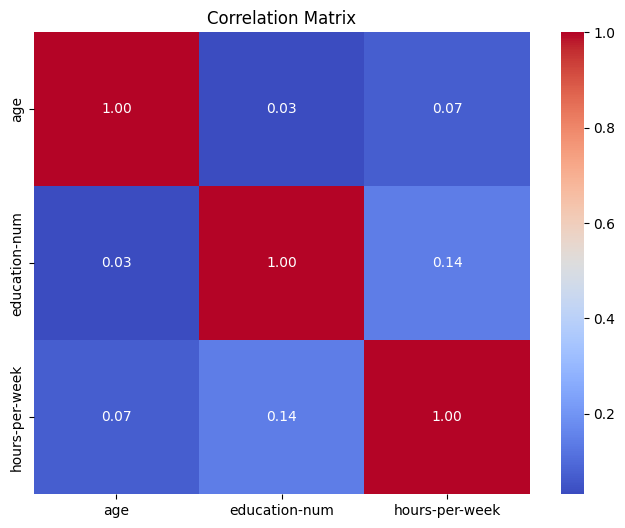

In [9]:
# Compute correlations
correlations = data[['age', 'education-num', 'hours-per-week']].corr()
print("Correlation Matrix:")
print(correlations)

# Plot the heatmap for visualization
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [10]:
from scipy.stats import pearsonr

# Test correlation significance
corr, p_value = pearsonr(data['education-num'], data['hours-per-week'])
print(f"Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")


Correlation Coefficient: 0.14368890939247936
P-value: 1.3860285325205765e-223


In [11]:
# Compute correlations by gender
male_corr = data[data['sex'] == 'Male'][['education-num', 'age']].corr().iloc[0, 1]
female_corr = data[data['sex'] == 'Female'][['education-num', 'age']].corr().iloc[0, 1]

print(f"Correlation between education-num and age for males: {male_corr}")
print(f"Correlation between education-num and age for females: {female_corr}")


Correlation between education-num and age for males: 0.0540742910436307
Correlation between education-num and age for females: -0.02047846977881392


In [12]:
#Linear Regression Analysis
import statsmodels.api as sm

# Encode 'sex' as a binary variable: Male = 1, Female = 0
data['sex_binary'] = data['sex'].apply(lambda x: 1 if x == 'Male' else 0)

# Simple regression: hours-per-week ~ sex
X = sm.add_constant(data['sex_binary'])  # Add constant for intercept
y = data['hours-per-week']
model_1 = sm.OLS(y, X).fit()
print(model_1.summary())


                            OLS Regression Results                            
Dep. Variable:         hours-per-week   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     2692.
Date:                Sun, 24 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:39:06   Log-Likelihood:            -1.9093e+05
No. Observations:               48842   AIC:                         3.819e+05
Df Residuals:                   48840   BIC:                         3.819e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4007      0.095    383.958      0.0

In [13]:
# Multiple regression: hours-per-week ~ sex + education-num
X = sm.add_constant(data[['sex_binary', 'education-num']])
model_2 = sm.OLS(y, X).fit()
print(model_2.summary())


                            OLS Regression Results                            
Dep. Variable:         hours-per-week   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     1903.
Date:                Sun, 24 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:40:46   Log-Likelihood:            -1.9041e+05
No. Observations:               48842   AIC:                         3.808e+05
Df Residuals:                   48839   BIC:                         3.808e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            29.5474      0.231    127.963

In [14]:
# Create gross_income_group as a binary variable
data['gross_income_group'] = data['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Multiple regression: hours-per-week ~ sex + education-num + gross_income_group
X = sm.add_constant(data[['sex_binary', 'education-num', 'gross_income_group']])
model_3 = sm.OLS(y, X).fit()
print(model_3.summary())


                            OLS Regression Results                            
Dep. Variable:         hours-per-week   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     1493.
Date:                Sun, 24 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:41:02   Log-Likelihood:            -1.9010e+05
No. Observations:               48842   AIC:                         3.802e+05
Df Residuals:                   48838   BIC:                         3.802e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 30.6979      0